In [1]:
import sys

0.11.0
num wav: 3229


C:\Users\11604\anaconda3\envs\haptics-ae\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



--- After_someone_hands_you_a_hot_potato__you_juggle_i_OLKJ5M_modelB_3.wav
sr: 8000 len: 80000 min/max: -0.328125 0.2734375


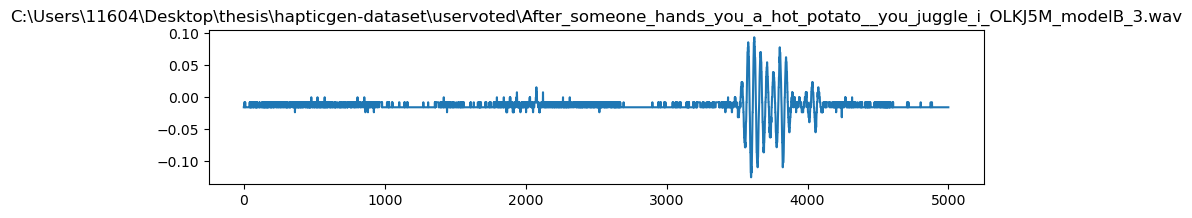


--- A_baseline_rally_between_two_tennis_players_on_a_t_36JQYO_modelA_1.wav
sr: 8000 len: 80000 min/max: -0.5234375 0.515625


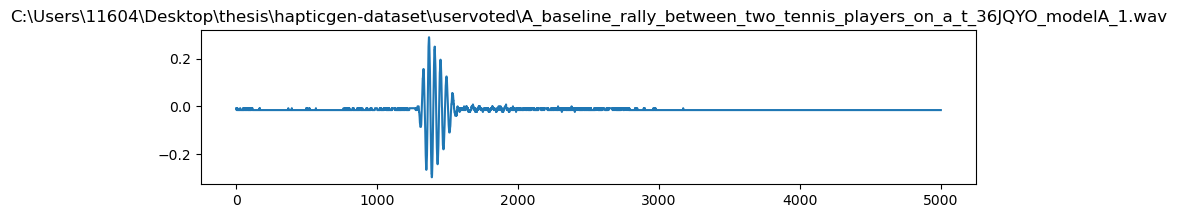


--- I_got_so_angry_that_my_breathing_became_heavy._7HFOB_modelB_2.wav
sr: 8000 len: 80000 min/max: -0.90625 0.875


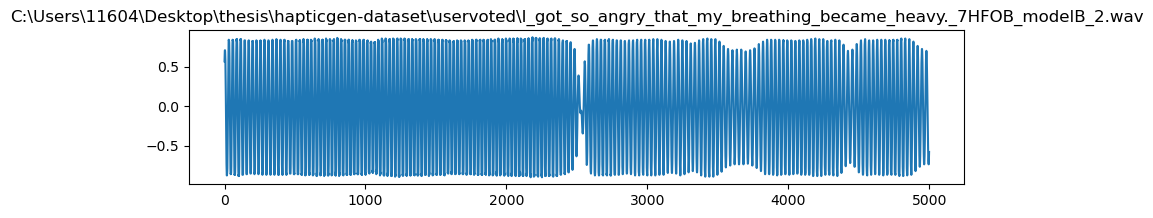

In [2]:
import os, glob, random
import numpy as np
import librosa
import matplotlib.pyplot as plt
import json

print(librosa.__version__)

root = r"C:\Users\11604\Desktop\thesis\hapticgen-dataset\uservoted"  # 改这里
wav_files = glob.glob(os.path.join(root, "**/*.wav"), recursive=True)
print("num wav:", len(wav_files))

sample_wavs = random.sample(wav_files, 3)

for p in sample_wavs:
    y, sr = librosa.load(p, sr=None, mono=True)
    print("\n---", os.path.basename(p))
    print("sr:", sr, "len:", len(y), "min/max:", float(y.min()), float(y.max()))
    plt.figure(figsize=(10,2))
    plt.plot(y[:5000])   # 先画前 5000 点
    plt.title(p)
    plt.show()

    # 尝试找同名 json（如果有）
    jp = os.path.splitext(p)[0] + ".json"
    if os.path.exists(jp):
        with open(jp, "r", encoding="utf-8") as f:
            meta = json.load(f)
        print("json keys:", list(meta.keys())[:20])
